In [1]:
#importing data
import pandas as pd
df=pd.read_csv("C:/Users/Predator/Desktop/Weekly_Workouts/Week_16/sentiment_data.csv")

In [2]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [3]:
df.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [9]:
df.shape

(38932, 5)

In [13]:
df["Is_Response"].replace("not happy","negative",inplace=True)
df["Is_Response"].replace("happy","positive",inplace=True)
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,negative
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,negative
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,negative
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,positive
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,negative


C:\Users\Predator\Desktop\Jupyter_Notebook\new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Predator\Desktop\Jupyter_Notebook\new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Predator\Desktop\Jupyter_Notebook\new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Predator\Desktop\Jupyter_Notebook\new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

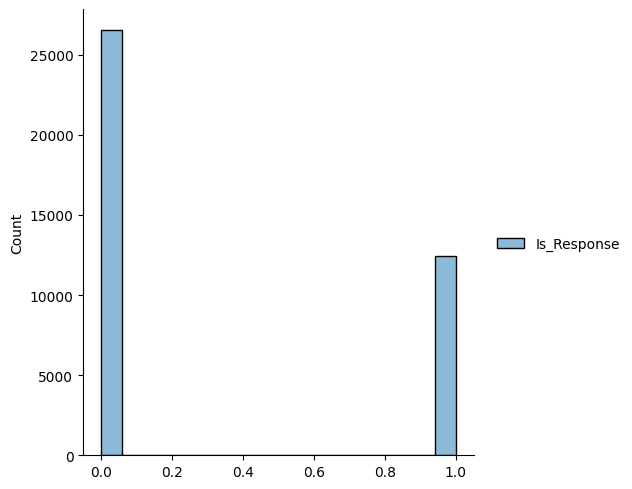

In [23]:
import seaborn as sns
x=pd.DataFrame(df["Is_Response"].replace({"positive":0,"negative":1}))
sns.displot(x)

## Performing EDA

In [25]:
df.drop(["User_ID","Browser_Used","Device_Used"],axis=1,inplace=True)

In [26]:
df.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,negative
1,I stayed at the Crown Plaza April -- - April -...,negative
2,I booked this hotel through Hotwire at the low...,negative
3,Stayed here with husband and sons on the way t...,positive
4,My girlfriends and I stayed here to celebrate ...,negative


In [27]:
#converting to lower case
#removing square brackets
#removing punctuation
#removing words with numbers 
#removing special characters
#removing new line
import re 
import string
def clean_text(text):
    text=text.lower()
    text=re.sub("\[.*?\]","",text)
    text=re.sub("[%s]" % re.escape(string.punctuation),"",text)
    text=re.sub("\w*\d\w*","",text)
    text=re.sub('[‘’“”…]', '', text)
    text=re.sub('\n', '', text)
    return text

cleaned=lambda x:clean_text(x)

In [29]:
df["cleaned_description"]=pd.DataFrame(df["Description"].apply(cleaned))

In [30]:
df.head()

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,negative,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,negative,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,negative,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,positive,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,negative,my girlfriends and i stayed here to celebrate ...


In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.cleaned_description,df.Is_Response,test_size=0.3,random_state=100)

In [41]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((27252,), (11680,), (27252,), (11680,))

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression

TFIDF=TfidfVectorizer()
classifier=RandomForestClassifier()
#classifier = LogisticRegression()


In [43]:
from sklearn.pipeline import Pipeline

In [44]:
model=Pipeline([("vectorizer",TFIDF),("classifier",classifier)])
model.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [45]:
y_pred=model.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [48]:
accuracy_score(y_test,y_pred)

0.811472602739726

In [49]:
confusion_matrix(y_test,y_pred)

array([[1677, 2061],
       [ 141, 7801]], dtype=int64)

In [51]:
precision_score(y_test,y_pred,average="weighted")

0.8330769133917861

In [52]:
recall_score(y_test,y_pred,average="weighted")

0.811472602739726

In [56]:
model.predict(["bad experience"])

array(['positive'], dtype=object)